# Assignment Task 2: Visualise Data Insights using Seaborn (15 marks)

# Sub Task 1: Data Preparation(2 marks)

* Import libraries and load data
* Change the labelling for better interpretation/ visualization understanding

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cardiac_disease.csv')

In [8]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})
df['cp'] = df['cp'].map({0: 'asymptomatic', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'typical angina'})
df['fbs'] = df['fbs'].map({0: 'No', 1: 'Yes'})
df['exang'] = df['exang'].map({0: 'No', 1: 'Yes'})
df['slope'] = df['slope'].map({0: 'downsloping', 1: 'flat', 2: 'upsloping'})
df['thal'] = df['thal'].map({1 : 'normal', 2 : 'fixed defect', 3 : 'reversible defect'})
df['target'] = df['target'].map({0: 'No disease', 1: 'Disease'})
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thal,target
0,63,Male,typical angina,145,233,Yes,0,150,No,2.3,downsloping,0,normal,Disease
1,37,Male,non-anginal pain,130,250,No,1,187,No,3.5,downsloping,0,fixed defect,Disease
2,41,Female,atypical angina,130,204,No,0,172,No,1.4,upsloping,0,fixed defect,Disease
3,56,Male,atypical angina,120,236,No,1,178,No,0.8,upsloping,0,fixed defect,Disease
4,57,Female,asymptomatic,120,354,No,1,163,Yes,0.6,upsloping,0,fixed defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,asymptomatic,140,241,No,1,123,Yes,0.2,flat,0,reversible defect,No disease
299,45,Male,typical angina,110,264,No,1,132,No,1.2,flat,0,reversible defect,No disease
300,68,Male,asymptomatic,144,193,Yes,1,141,No,3.4,flat,2,reversible defect,No disease
301,57,Male,asymptomatic,130,131,No,1,115,Yes,1.2,flat,1,reversible defect,No disease


# Sub Task 2: Show Distribution of Different Numerical Variables (2 marks)

* Show distribution of values for age, trtbps and chol


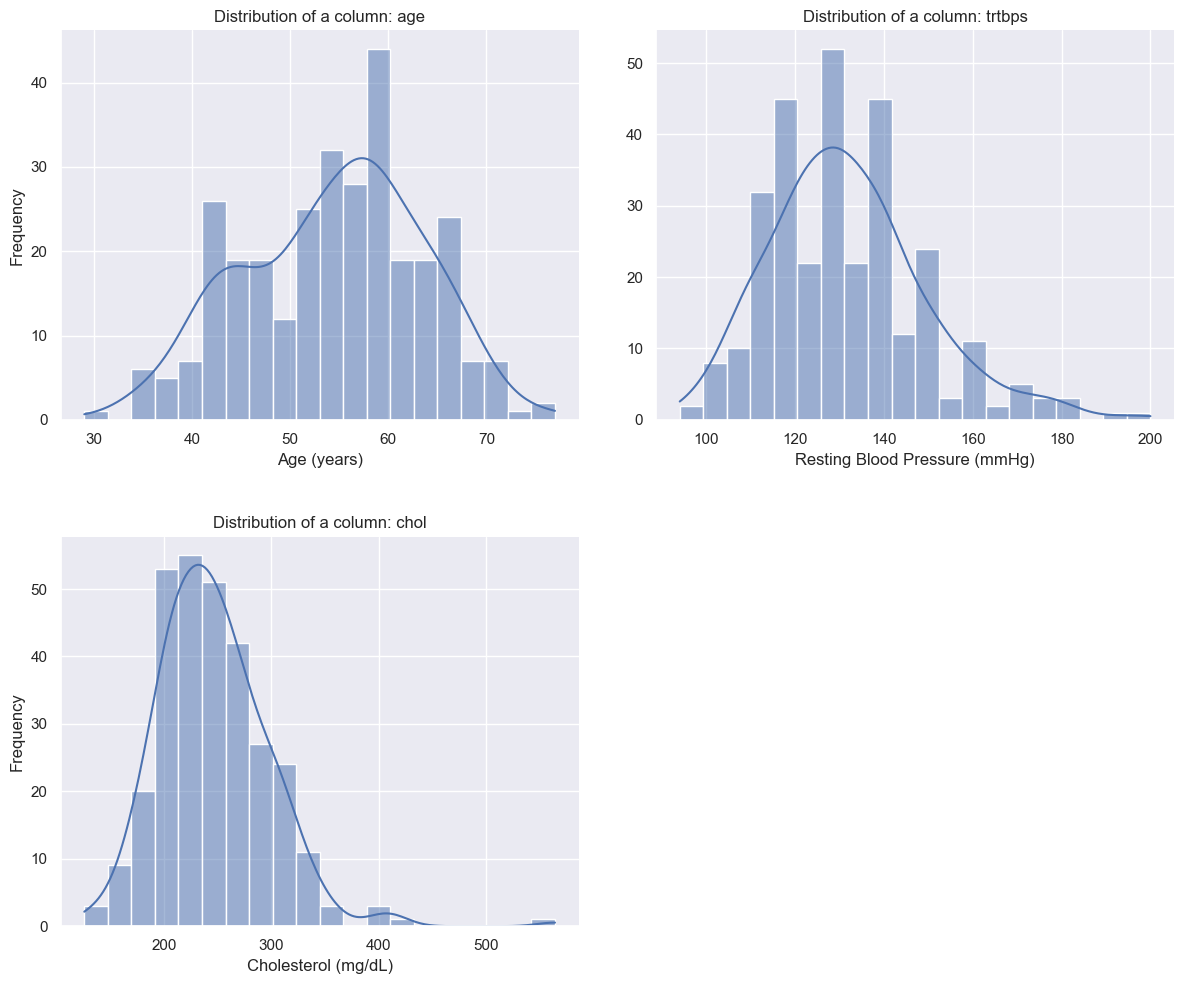

In [52]:
numerical_vars = ['age', 'trtbps', 'chol']
sns.set_theme(style="darkgrid")

# Need to wrap the figure
g = sns.FacetGrid(data=df.melt(value_vars=numerical_vars), col='variable', col_wrap=2, sharex=False, sharey=False, height=5, aspect=1.2)

g.map_dataframe(sns.histplot, x='value', kde=True, bins=20, edgecolor='white')

g.set_titles(col_template='Distribution of a column: {col_name}')

x_label_map = {
    'age': 'Age (years)',
    'trtbps': 'Resting Blood Pressure (mmHg)',
    'chol': 'Cholesterol (mg/dL)'
}

for ax, variable in zip(g.axes.flat, numerical_vars):
    ax.set_xlabel(x_label_map.get(variable, ''))

g.set_ylabels('Frequency')

plt.subplots_adjust(hspace=0.3, wspace=0.15)


plt.show()

# Sub Task 3: Show Distribution of Different Categorical Variables (2 marks)

* Show distribution of values for sex, cp, fbs, restecg, exang and slope



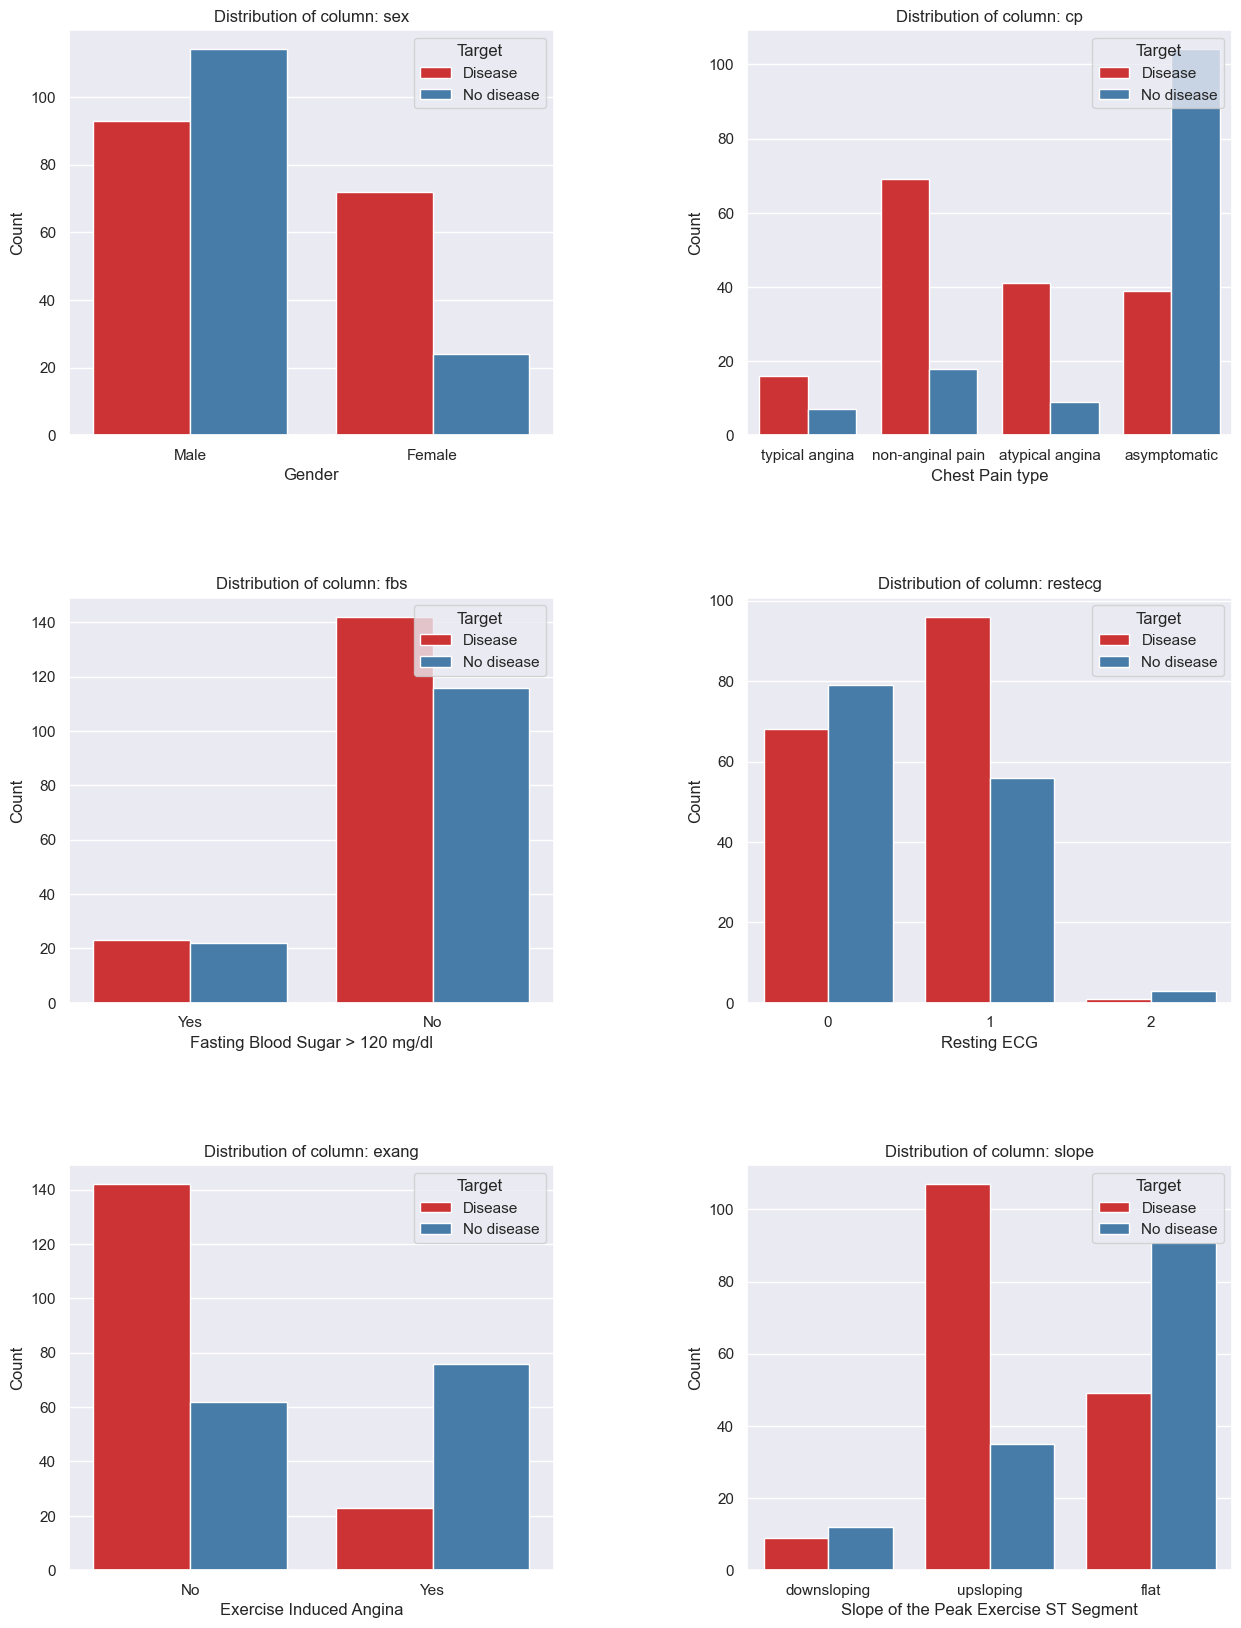

In [100]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

fig, axes = plt.subplots(3, 2, figsize=(15, 20), sharey=False)
axes = axes.flatten()

x_label_map = {
    'sex': 'Gender',
    'cp': 'Chest Pain type',
    'fbs': 'Fasting Blood Sugar > 120 mg/dl',
    'restecg': 'Resting ECG',
    'exang': 'Exercise Induced Angina',
    'slope': 'Slope of the Peak Exercise ST Segment'
}

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='target', data=df, ax=axes[i], palette="Set1")
    # ms teo it look me too long to find this palette
    
    axes[i].set_title(f'Distribution of column: {var}')
    axes[i].set_xlabel(x_label_map.get(var, ''))
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target', loc='upper right')

# Adjust layout
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

# Sub Task 4: Create Box Plots (2 marks)

Create box plots to visualise the distribution of cholesterol and age by gender for disease and no disease group. 

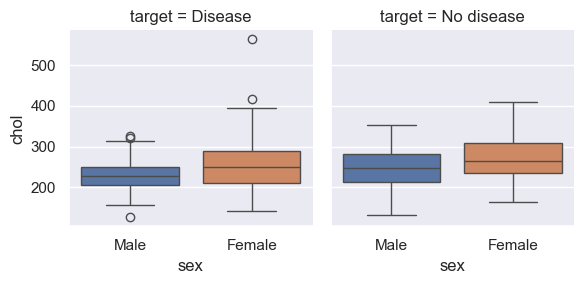

In [132]:
g = sns.FacetGrid(df, col="target", height=3)

g.map_dataframe(sns.boxplot, x='sex', y='chol', hue='sex', palette='deep')

g.set_titles(col_template="target = {col_name}")

plt.show()

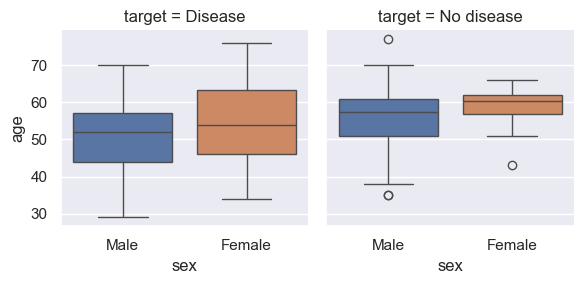

In [134]:
g = sns.FacetGrid(df, col="target", height=3)

g.map_dataframe(sns.boxplot, x='sex', y='age', hue='sex', palette='deep')

g.set_titles(col_template="target = {col_name}")

plt.show()

# Sub Task 5: Linear Relationship Plots (2 marks)

Use linear relationship plots to  understand the following:
1. The relationship between age and chol in each of the target, based on sex.
2. The relationship between age and chol in each of the sex, based on target.


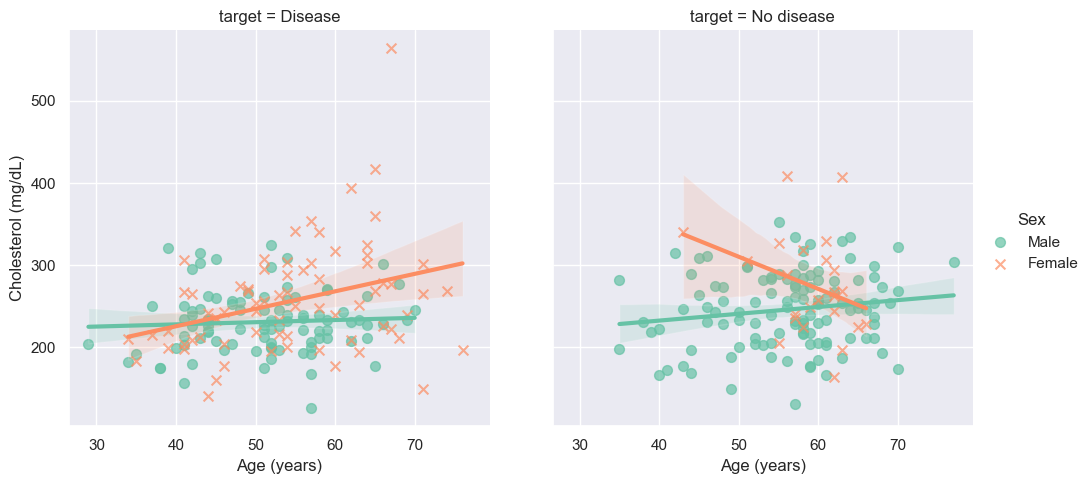

In [137]:
# Create the lmplot
g = sns.lmplot(
    x='age',
    y='chol',
    hue='sex',
    col='target',
    data=df,
    height=5,
    aspect=1,
    palette='Set2',  # Use a palette similar to the example
    markers=['o', 'x'],  # Use different markers for Male and Female
    scatter_kws={'s': 50, 'alpha': 0.7},  # Adjust marker size and transparency
    line_kws={'lw': 3}  # Adjust line width
)

# Set titles and labels
g.set_titles(col_template='target = {col_name}')
g.set_axis_labels("Age (years)", "Cholesterol (mg/dL)")

# Add a legend
g.legend.set_title('Sex')

# Adjust layout
plt.subplots_adjust(wspace=0.15)
plt.show()

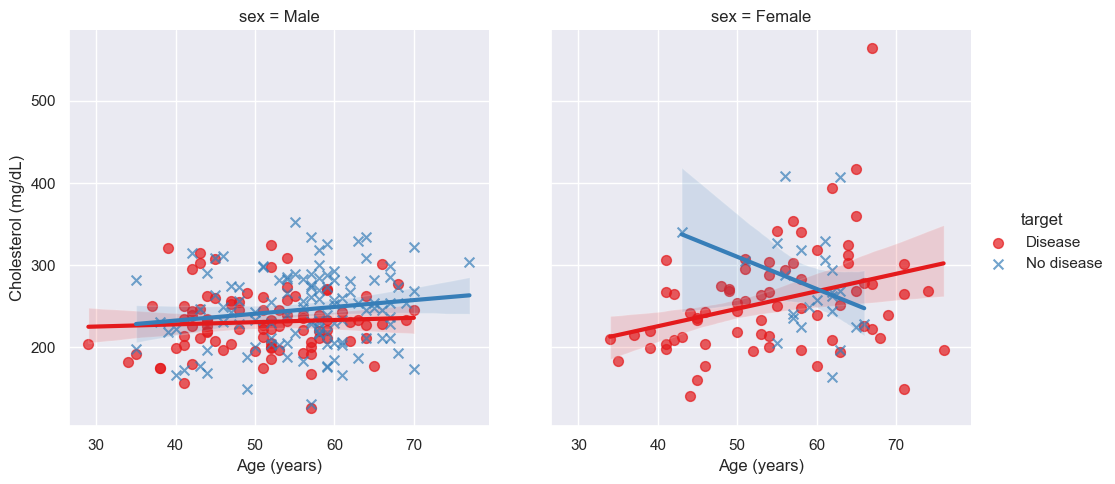

In [145]:
# Create the lmplot
g = sns.lmplot(
    x='age',
    y='chol',
    hue='target',
    col='sex',
    data=df,
    height=5,
    aspect=1,
    palette='Set1',  # Use a palette similar to the example
    markers=['o', 'x'],  # Use different markers for Male and Female
    scatter_kws={'s': 50, 'alpha': 0.7},  # Adjust marker size and transparency
    line_kws={'lw': 3}  # Adjust line width
)

# Set titles and labels
g.set_titles(col_template='sex = {col_name}')
g.set_axis_labels("Age (years)", "Cholesterol (mg/dL)")

# Add a legend
g.legend.set_title('target')

# Adjust layout
plt.subplots_adjust(wspace=0.15)
plt.show()

# Sub Task 6: Create a Pairplot (1 mark)

Create a pairplot with the columns: age, chol, thal, oldpeak, trtbps.


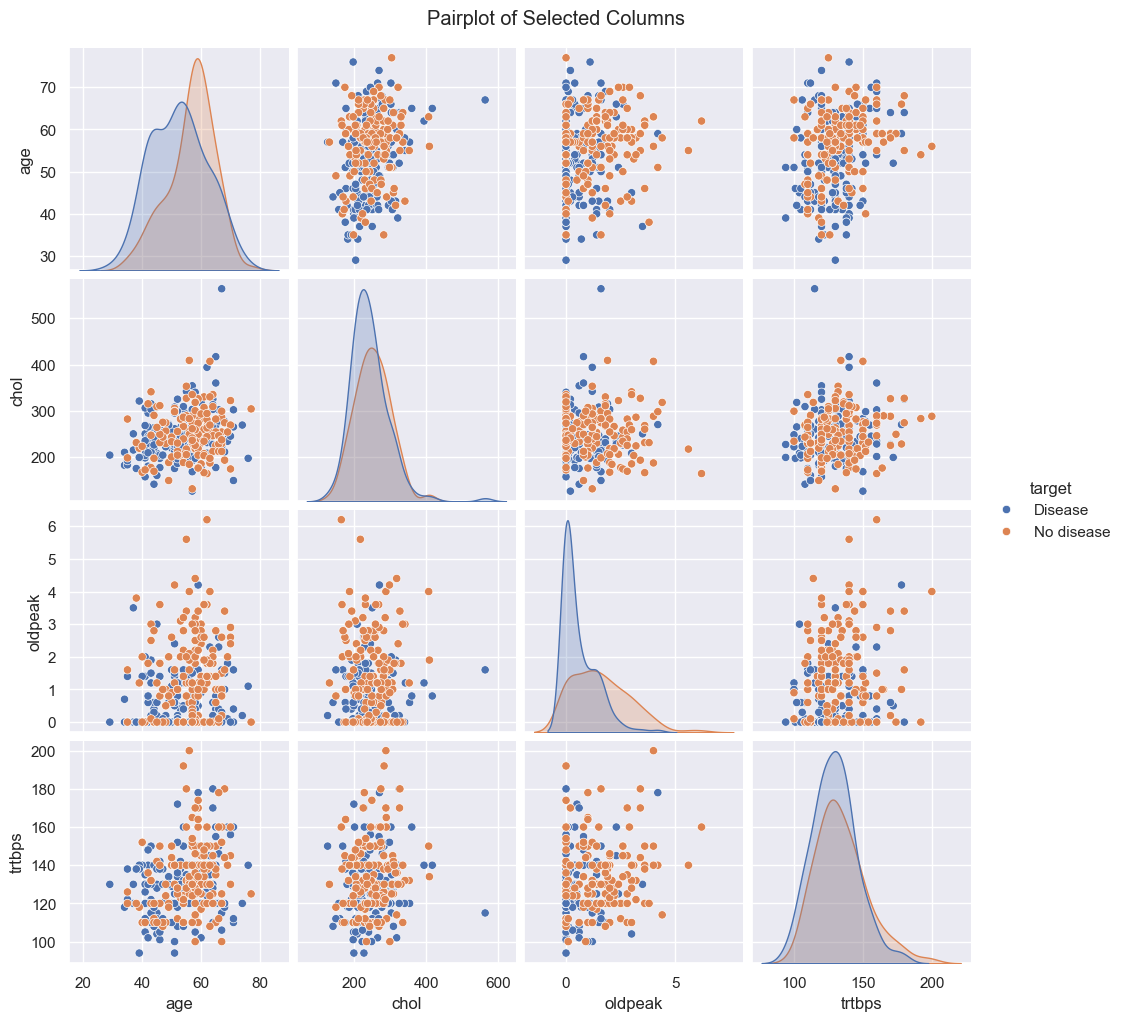

In [146]:
sns.set_theme(style="darkgrid")
sns.pairplot(df[['age', 'chol', 'thal', 'oldpeak', 'trtbps', 'target']], hue='target', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

# Sub Task 7: Create Heatmap (2 marks)

1 Using the 6 selected region DataFrame, create a heatmap of the correlation matrix created when using the .corr() method on the transactions dataframe. Use the 'BuPu' color palette.

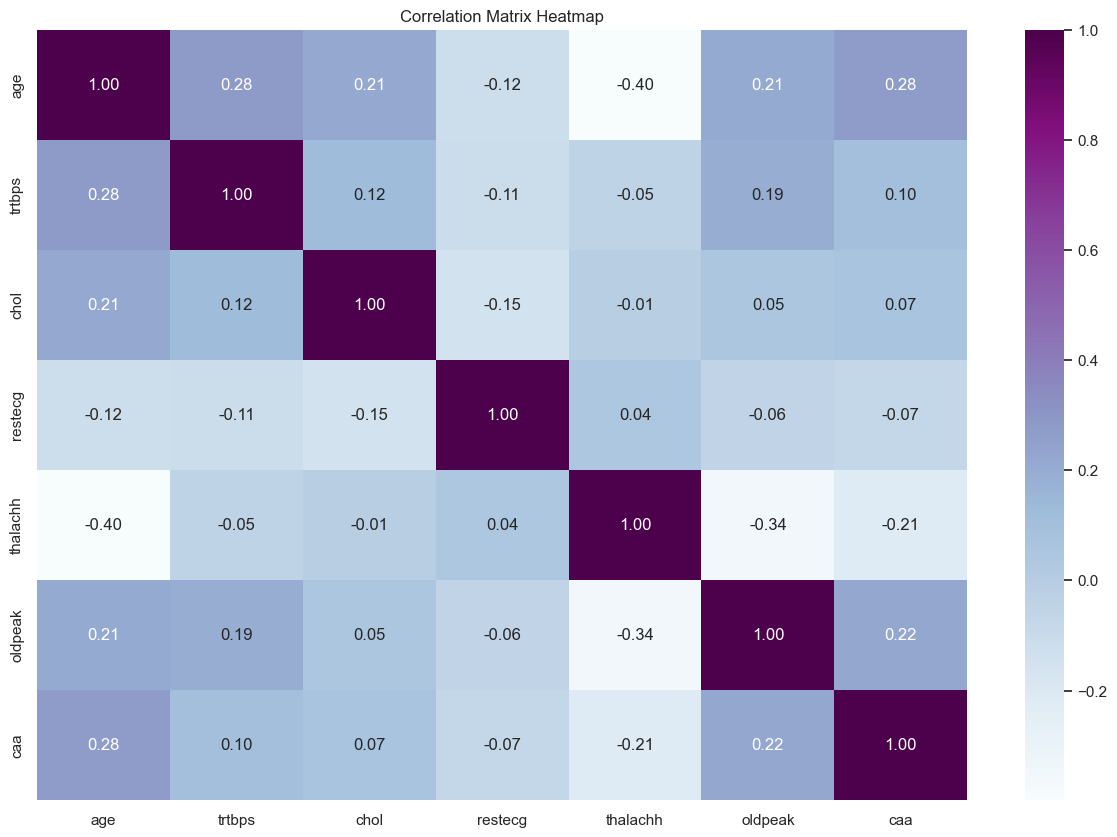

In [149]:
corr_matrix = df[['age', 'trtbps', 'chol', 'restecg', 'thalachh', 'oldpeak', 'caa']].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

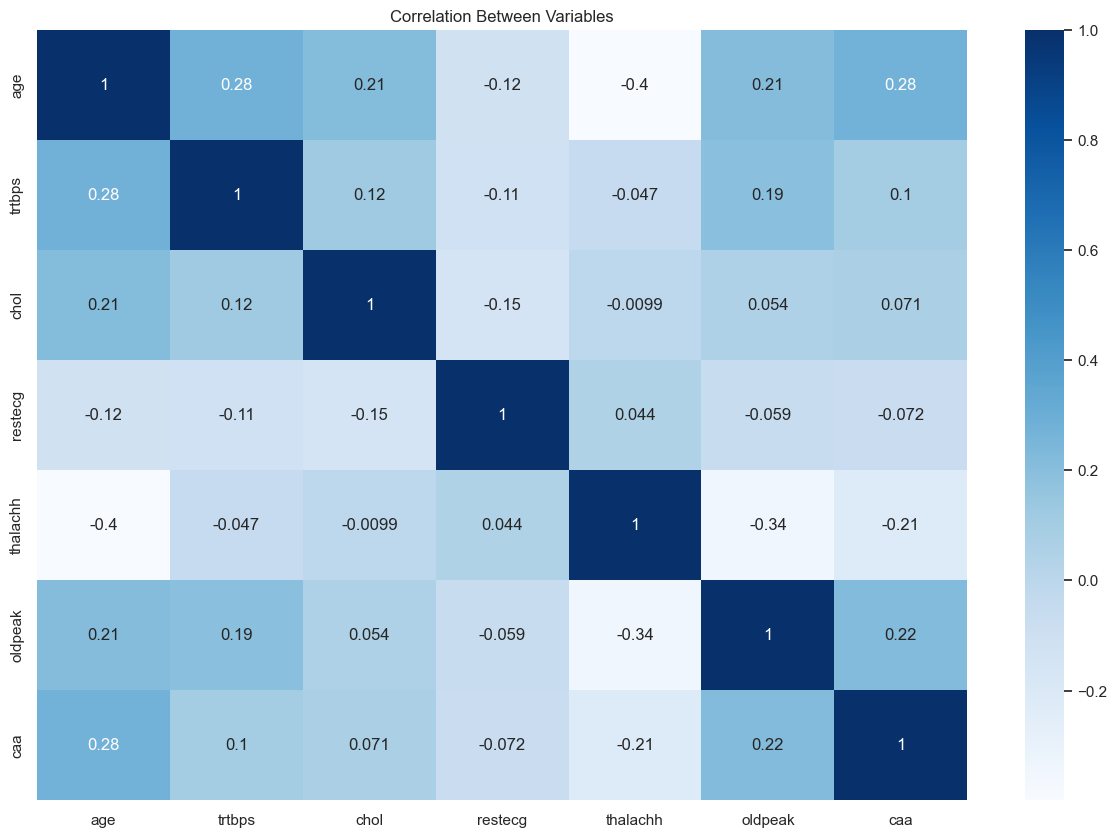

In [158]:
corr_matrix = df[['age', 'trtbps', 'chol', 'restecg', 'thalachh', 'oldpeak', 'caa']].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Between Variables')
plt.show()

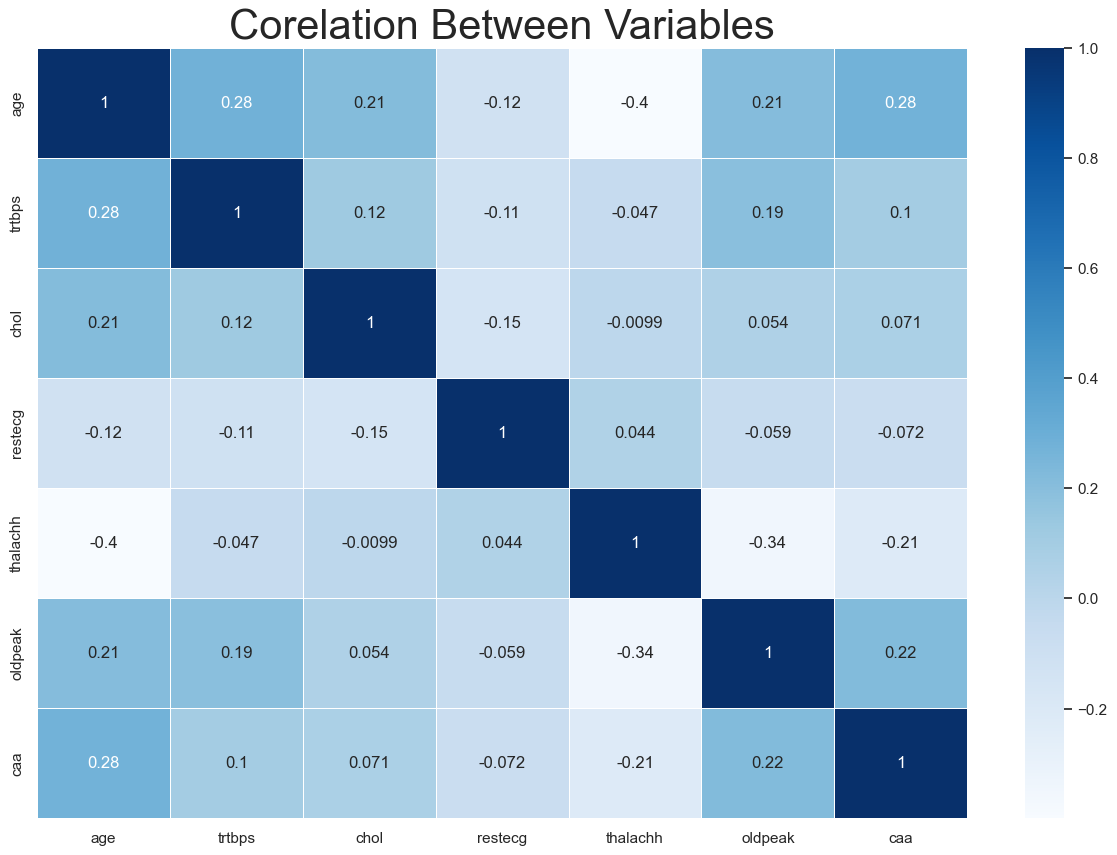

# Sub Task 8: Conclusion (2 marks)

Summarise your data exploratory task in one or 2 paragraph(s)


Initial examination of numerical variables revealed a relatively even distribution of age, centered around 50-60 years, while resting blood pressure exhibited a right-skewed distribution, and cholesterol levels displayed an even more pronounced right skew. Analysis of categorical variables offered intriguing insights: females appeared more susceptible to the disease than males, and individuals experiencing asymptomatic chest pain were less likely to be diagnosed with this particular cardiac condition. Furthermore, patients diagnosed with the disease tended to exhibit specific characteristics, including the absence of exercise-induced angina, an upsloping slope of the peak exercise ST segment, non-anginal chest pain, no fasting blood sugar above 120 mg/dL, and a normal resting ECG.

Further investigation into variable relationships yielded mixed results regarding the impact of cholesterol. Box plots suggested a similar distribution of cholesterol levels between disease and no-disease groups, indicating its potential lack of discriminatory power in this specific context. Age also showed relatively comparable distributions across disease statuses, although individuals with the disease exhibited a wider age range. Notably, the linear relationship plots revealed a surprising interaction between age, cholesterol, and sex in relation to disease susceptibility. While the relationship appeared similar for males across both target groups, females exhibited an intriguing trend: a positive association between age and cholesterol appeared to be linked to a higher likelihood of the disease, whereas a negative association suggested the opposite. The observation of old peak (ST depression induced by exercise) reaching 6 strongly indicated a high probability of disease. Finally, the correlation matrix heatmap indicated generally low correlations between most numerical variables. However, notable positive correlations were observed between age, the number of major vessels, and ST depression induced by exercise. In conclusion, this comprehensive EDA effectively characterized the dataset's distributions, identified potential risk factors and their complex interactions, and revealed surprising trends, setting a strong foundation for developing more targeted and potentially sex-specific strategies for cardiac disease prediction and prevention.